In [1]:
from twython import Twython
import json

# Load credentials from json file
with open("twitter_credentials.json", "r") as file:
    creds = json.load(file)

# Instantiate an object
twitter = Twython(creds['CONSUMER_KEY'], creds['CONSUMER_SECRET'])

# Create our query
query = {'screen_name': 'dchalpern'
        }

In [2]:
import pandas as pd
returned = {}
# Search tweets
dict_ = {'user': [], 'date': [], 'text': [], 'favorite_count': []}


In [3]:
twitter.get(endpoint='https://api.twitter.com/1.1/friends/list.json', params={'screen_name':'dchalpern'})

{'users': [{'id': 330568654,
   'id_str': '330568654',
   'name': 'katie kowalsky',
   'screen_name': 'KatieKowalsky',
   'location': 'San Francisco, CA',
   'description': 'live. laugh. love sandwiches. cartographer & product witch 🌿🌎✨ she/her',
   'url': None,
   'entities': {'description': {'urls': []}},
   'protected': False,
   'followers_count': 1812,
   'friends_count': 714,
   'listed_count': 80,
   'created_at': 'Wed Jul 06 20:29:06 +0000 2011',
   'favourites_count': 28524,
   'utc_offset': None,
   'time_zone': None,
   'geo_enabled': True,
   'verified': False,
   'statuses_count': 2835,
   'lang': None,
   'status': {'created_at': 'Tue Feb 04 21:55:43 +0000 2020',
    'id': 1224813812076834816,
    'id_str': '1224813812076834816',
    'text': '@lyzidiamond I feel like I’ve been accidentally working towards being a notary all my life',
    'truncated': False,
    'entities': {'hashtags': [],
     'symbols': [],
     'user_mentions': [{'screen_name': 'lyzidiamond',
       'n

In [4]:
twitter.get(endpoint='https://api.twitter.com/1.1/friendships/show.json', params={'source_screen_name':'dchalpern', "target_screen_name":'KatieKowalsky'})

{'relationship': {'source': {'id': 805473822,
   'id_str': '805473822',
   'screen_name': 'dchalpern',
   'following': True,
   'followed_by': False,
   'live_following': False,
   'following_received': None,
   'following_requested': None,
   'notifications_enabled': None,
   'can_dm': False,
   'can_media_tag': None,
   'blocking': None,
   'blocked_by': None,
   'muting': None,
   'want_retweets': None,
   'all_replies': None,
   'marked_spam': None},
  'target': {'id': 330568654,
   'id_str': '330568654',
   'screen_name': 'KatieKowalsky',
   'following': False,
   'followed_by': True,
   'following_received': None,
   'following_requested': None}}}

In [6]:
twitter.get(endpoint='https://api.twitter.com/1.1/friends/ids.json', params={'screen_name':'washingtonpost'})

{'ids': [1206978927928979456,
  261124937,
  429399439,
  83505025,
  25513747,
  432054515,
  4562090896,
  2482948225,
  181429049,
  22835289,
  881761753838665728,
  42656344,
  18815447,
  68738412,
  618246752,
  113851780,
  497653485,
  218129328,
  157875409,
  20611223,
  24827447,
  22462270,
  25702314,
  21063128,
  2369960792,
  19753434,
  19042788,
  10877082,
  2810210762,
  3447765929,
  295749907,
  15777758,
  245415310,
  182394467,
  106721732,
  1277968200,
  17036950,
  29233157,
  124561405,
  3284628937,
  263586455,
  53157117,
  394635011,
  2155528914,
  72925271,
  2795677612,
  24553661,
  2359377054,
  1063236495123861506,
  89537438,
  334116429,
  1151723851,
  39071969,
  333174260,
  591282827,
  575715232,
  249962999,
  21331143,
  460687389,
  16517419,
  15463390,
  2975423277,
  66732477,
  330574021,
  344390233,
  296932340,
  423763698,
  2258994919,
  230190627,
  23965221,
  35910675,
  18770492,
  1117102549,
  19318576,
  57417461,
  2281

In [4]:
returned = twitter.get(endpoint='https://api.twitter.com/1.1/statuses/user_timeline.json', params={'screen_name':'washingtonpost','count':200, 'exclude_replies':True, 'include_rts':False})

In [15]:
text_block = ""
for entry in returned:
    text_block+= f"{entry['text']} "
    

In [16]:
text_block

'Breaking: All four prosecutors in Roger Stone’s case have asked to withdraw, raising questions about politicization… https://t.co/c84kcIJGl6 Prince George’s officer accused of shooting of handcuffed man fighting a murder charge https://t.co/ae0bJvNNv3 Opinion: Klobuchar’s friends tell a different story about her https://t.co/4wd6hEwRcp For China’s leaders, pop-up hospitals are about politics as much as health https://t.co/0llYnsZTA4 Denver just ended its 30-year ban on pit bulls https://t.co/Utgvmwd2sq A child-welfare worker came to pick up a second-grader. The school handed over the wrong student. https://t.co/SLz5msEiBs The viral "broomstick challenge" always works https://t.co/f7TIvlVzjn U.S.-Mexico border crossings continue to drop, but Mexican migrants surging https://t.co/QdQaCZU4Xo American Airlines extends China flight cancellations through April https://t.co/cD1dks0NqN Fall back in love with Valentine’s Day by breaking out of your dinner-and-flowers rut https://t.co/ZlRC3X8Y5

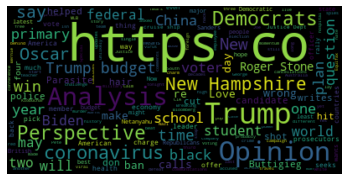

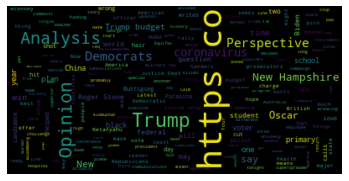

In [17]:
import os

from os import path
from wordcloud import WordCloud

# Read the whole text.
text = text_block

# Generate a word cloud image
wordcloud = WordCloud().generate(text)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [5]:
text_block = ""
followers_list = ['mitsap','ArchDaily','designboom','la_Biennale','MITarchitecture']
for follower in followers_list:
    print(follower)
    returned = twitter.get(endpoint='https://api.twitter.com/1.1/statuses/user_timeline.json', params={'screen_name':follower,'count':200, 'exclude_replies':True, 'include_rts':False})
    print(len(returned))
    print(len(text_block))
    for entry in returned:
        text_block+= f"{entry['text']} "

mitsap
102
0
ArchDaily
200
9624
designboom
199
25861
la_Biennale
188
51205
MITarchitecture
65
75650


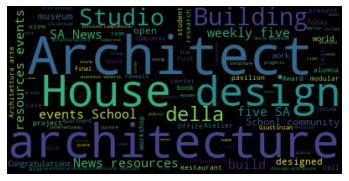

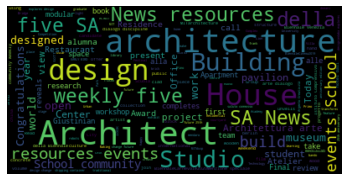

In [65]:
import os

from os import path
from wordcloud import WordCloud

# Read the whole text.
text = text_block2

# Generate a word cloud image
wordcloud = WordCloud().generate(text)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [34]:
from textblob import TextBlob
import nltk
nltk.download('brown')
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))

[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\cello\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\cello\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\cello\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [35]:
import re

text_block = re.sub("https", " ",  text_block)

In [41]:
words_list = text_block.split()
text_block2 = ""
for word in words_list:
    if ((word[0:3]=='://') or (word=="https") or (word in stopwords)):
        continue
    elif (word[0:1]=="#"):
        text_block2+=f"{word[1:]}"
    elif (len(word)<4):
        pass
    else:
        text_block2+=f"{word} "
text_block2 = re.sub("@", "",  text_block2)
text_block2 = re.sub("amp", "",  text_block2)
text_block2 = re.sub(",", "",  text_block2)
text_block2 = re.sub("&", " ",  text_block2)
text_block2 = re.sub(":", " ",  text_block2)
text_block2 = re.sub("’", " ",  text_block2)
text_block2 = re.sub("'", " ",  text_block2)
text_block2 = re.sub("``", " ",  text_block2)


In [42]:
text_block2

'Want vacant storefronts? artists take _spaceus MITarchitecture… Today 12 30! Today 6pm ACTMIT event  Naeem Mohaiemen Missing Film"—lecture followed conversation Sylvi… Your weekly five SA+P  News resources events School community. Collier Memorial AIANational s 2019 Innovation Award winner. Congratulations former MITarchitecture… Learn admissions programs school culture research architecture upcoming online info… weekly five SA+P  News resources events School community. Today Starting 6pm! Student Q ;A Panel Live Stream MITCRE in-depth view life MSRED student!… Congratulations medialab s Danielle Wood recently inducted International Academy Astronautics… Today 2pm! Carl D Apolito-Dworkin Yushiro Okamoto  Case Studies DS+R Preston Scott Cohen Architects… Your weekly five SA+P  news resources events more. Tomorrow 5 30pm Keller Gallery opening reception Cristina Parreño Alonso  Transtectonics.… Tomorrow 6pm MITarchitecture fall lecture series  "Conversations Care" Beatrice Galilee Milja

In [64]:
import nltk
from nltk import word_tokenize
from nltk.util import ngrams
from collections import Counter

token = nltk.word_tokenize(text_block2)
bigrams = ngrams(token,2)
print(Counter(bigrams))

Counter({('five', 'SA+P'): 18, ('resources', 'events'): 18, ('weekly', 'five'): 17, ('SA+P', 'News'): 17, ('News', 'resources'): 17, ('events', 'School'): 17, ('School', 'community'): 17, ('community', '.'): 17, ('Architettura', 'arte'): 10, ('all', 'Istituto'): 8, ('BiennaleCarnevale2020Menzione', 'speciale'): 8, ('Biennale', 'Venezia'): 8, ('arte', 'dialogo'): 8, ('dialogo', 'discipline'): 8, ('MITarchitecture', 's'): 7, ('Istituto', 'Comprensivo'): 7, ('della', 'Biennale'): 7, ('world', 's'): 6, ('.', 'weekly'): 6, ('d', 'Argento'): 6, ('speciale', 'all'): 6, ('“', 'Architettura'): 6, ('designindaba', '2020'): 5, ('2020', 'explores'): 5, ('explores', 'design'): 5, ('design', 'change'): 5, ('change', 'future'): 5, ('future', '25th'): 5, ('25th', 'anniversary'): 5, ('anniversary', 'edition'): 5, ('hotel', 'bali'): 5, ('saluto', 'commosso'): 5, ('Argento', 'Creatività'): 5, ('discipline', '”'): 5, ('!', '…'): 4, ('.', 'MITarchitecture'): 4, ('architecture', ';'): 4, ('gt', ';'): 4, ('a

In [51]:
print(Counter(bigrams))

Counter()
